0. 引入依赖

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from scipy.optimize import minimize
import matplotlib
from jingluo import *

1. 原始数据
    - 输入原始数据
    - 可视化原始数据

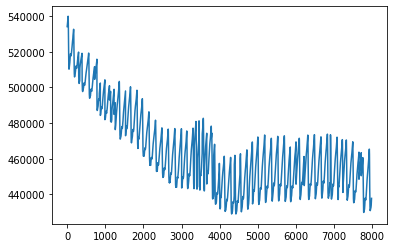

In [3]:
# 输入原始数据
raw_data=[534153, 534454, 534538, 534699, 535017, 535224, 535367, 535477, 535672, 535906, 536180, 536276, 536527, 536796, 537101, 537274, 537609, 537873, 538203, 538566, 538828, 539179, 539499, 539641, 539816, 539977, 539781, 539553, 538847, 538007, 536515, 534671, 532333, 529773, 527041, 524366, 521778, 519522, 517513, 515928, 514529, 513535, 512655, 511855, 511241, 510903, 510555, 510377, 510283, 510255, 510343, 510564, 510669, 510844, 511007, 511152, 511426, 511527, 511819, 512045, 512172, 512327, 512535, 512755, 512893, 513093, 513360, 513539, 513674, 513918, 514144, 514342, 514707, 515065, 515446, 515828, 516200, 516571, 516953, 517372, 517720, 517956, 518259, 518444, 518629, 518705, 518826, 518929, 518764, 518855, 518877, 518846, 518785, 518695, 518558, 518500, 518368, 518229, 518088, 518043, 517908, 517962, 517955, 517972, 517919, 517831, 518002, 518192, 518230, 518393, 518638, 518705, 518880, 519035, 519339, 519509, 519836, 519982, 520213, 520452, 520752, 520994, 521255, 521593, 521764, 522073, 522297, 522607, 522808, 523062, 523306, 523536, 523836, 524087, 524379, 524579, 524836, 525105, 525215, 525547, 525839, 526042, 526234, 526443, 526605, 526890, 527037, 527153, 527371, 527556, 528497, 528647, 528886, 529054, 529225, 529497, 529682, 529900, 530115, 530394, 530547, 530763, 531029, 531289, 531527, 531848, 532060, 532315, 532541, 532662, 532591, 532274, 531863, 530964, 529723, 528023, 526156, 523945, 521533, 519362, 517171, 515236, 513366, 511931, 510698, 509645, 508575, 507835, 507322, 506792, 506575, 506240, 506131, 505921, 506074, 506060, 506082, 506152, 506254, 506373, 506541, 506716, 506948, 507000, 507109, 507370, 507512, 507575, 507809, 507822, 507849, 508050, 508134, 508300, 508413, 508520, 508663, 508953, 509187, 509427, 509684, 509925, 510273, 510580, 510794, 511042, 511305, 511594, 511789, 511840, 511894, 512001, 512048, 512022, 511914, 511884, 511644, 511655, 511546, 511415, 511155, 511088, 511069, 510902, 510934, 510779, 510798, 510844, 510755, 510898, 510848, 510889, 511097, 511238, 511338, 511530, 511701, 511919, 511969, 512218, 512453, 512669, 512886, 513071, 513213, 513574, 513838, 514005, 514191, 514502, 514669, 514750, 515079, 515199, 515509, 515683, 515857, 516158, 516229, 516388, 516728, 516954, 517072, 517183, 517473, 517633, 517867, 518096, 518185, 518254, 518481, 518564, 518760, 518947, 518980, 519268, 519377, 519524, 519668, 519843, 510110, 508680, 507399, 506357, 505415, 504549, 503868, 503437, 502977, 502714, 502555, 502364, 502314, 502269, 502346, 502368, 502526, 502456, 502672, 502747, 502831, 503145, 503205, 503252, 503401, 503486, 503544, 503681, 503751, 503893, 510272, 510514, 510702, 510860, 511138, 511326, 511538, 511763, 511977, 512022, 512277, 512451, 512720, 512889, 513060, 513285, 513465, 513552, 513795, 513854, 514062, 514239, 514345, 514429, 514657, 514861, 514949, 515073, 515217, 515283, 515368, 515590, 515673, 515792, 515836, 515958, 516019, 516129, 516317, 516454, 516672, 516738, 516847, 516982, 517191, 517221, 517430, 517631, 517677, 517822, 518008, 518132, 518250, 518392, 518580, 518668, 518825, 518958, 519094, 519172, 507502, 505865, 504410, 503221, 502164, 501046, 500209, 499505, 499080, 498631, 498286, 498135, 497861, 497874, 497856, 497808, 497719, 497834, 497957, 498042, 498086, 498192, 498284, 498350, 498507, 498629, 498744, 498721, 498765, 498854, 499007, 498999, 499090, 499167, 499182, 499278, 499454, 499516, 499813, 499983, 500243, 500658, 500895, 501038, 501339, 501557, 501835, 502043, 502069, 502367, 502444, 502490, 502519, 502451, 502390, 502323, 502242, 502021, 502015, 501768, 501612, 501543, 501437, 501368, 501210, 501191, 501247, 501267, 501238, 501250, 501339, 501367, 501483, 501656, 501855, 501902, 502081, 502139, 502360, 502623, 502794, 502914, 503263, 503416, 503693, 503830, 504039, 504314, 504602, 504756, 505013, 505210, 505362, 505637, 505911, 506077, 506287, 506467, 506587, 506834, 507144, 507212, 507345, 507563, 507767, 507980, 508170, 508295, 508485, 508752, 508742, 508918, 509122, 509200, 509283, 509481, 509697, 509848, 509896, 510063, 510138, 510217, 510552, 510642, 510788, 510926, 511073, 511121, 511334, 511455, 511531, 511768, 511945, 512049, 512227, 512322, 512540, 512615, 512745, 513016, 513148, 513218, 513370, 513455, 513689, 513918, 514063, 514187, 514334, 514420, 514659, 514715, 514916, 515148, 515300, 515349, 515717, 515828, 515868, 516161, 516305, 516689, 516820, 516909, 517171, 517505, 517727, 518049, 518281, 518484, 518711, 518890, 519094, 519277, 519253, 519035, 518743, 518121, 517079, 515675, 513732, 511905, 509743, 507673, 505478, 503760, 502049, 500508, 499300, 498226, 497220, 496302, 495657, 495194, 494689, 494323, 494193, 494023, 493973, 494034, 494011, 493935, 494075, 494148, 494246, 494356, 494376, 494460, 494541, 494654, 494778, 494853, 494927, 495055, 495209, 495270, 495253, 495366, 495341, 495198, 495482, 495649, 495908, 496038, 496259, 496584, 496819, 497033, 497441, 497694, 498035, 498067, 498400, 498687, 498691, 499019, 499076, 499015, 499040, 498966, 498984, 498947, 498675, 498557, 498495, 498363, 498260, 498119, 498008, 497940, 497962, 497945, 497902, 497938, 498094, 497911, 498157, 498246, 498461, 498563, 498740, 498934, 499087, 499295, 499476, 499795, 499972, 500258, 500404, 500601, 500819, 501208, 501334, 501584, 501780, 502119, 502208, 502514, 502790, 503085, 503309, 503561, 503764, 504039, 504111, 504393, 504551, 504791, 504981, 505266, 505362, 505589, 505688, 505857, 506061, 506315, 506495, 506641, 506837, 507104, 507158, 507361, 507529, 507665, 507770, 507899, 508004, 508224, 508426, 508458, 508574, 508866, 508906, 509042, 509237, 509347, 509533, 509731, 510042, 510056, 510205, 510426, 510625, 510626, 510852, 511010, 511209, 511390, 511585, 511677, 504558, 504822, 504904, 505204, 505361, 505640, 505807, 505973, 506118, 506274, 506434, 506538, 506728, 506873, 507041, 507211, 507339, 507573, 507687, 507871, 508088, 508158, 508308, 508516, 508679, 509005, 509064, 509309, 509556, 509717, 509888, 510108, 510323, 510421, 510621, 510835, 510942, 511081, 511258, 511434, 511611, 511759, 512015, 512178, 512342, 512514, 512700, 512964, 513199, 513346, 513615, 513832, 513999, 514240, 514401, 514880, 515008, 515222, 515446, 515865, 489886, 489182, 488558, 488112, 487627, 487358, 487239, 487127, 487136, 487137, 487100, 487261, 487285, 487497, 487686, 487715, 487830, 488057, 488133, 488304, 488487, 488531, 488705, 488782, 488841, 488923, 489150, 489177, 489210, 489324, 489457, 489626, 489834, 490213, 490517, 490728, 491100, 491451, 491776, 492141, 492544, 492762, 492877, 493231, 493384, 493380, 493525, 493554, 493648, 493573, 493556, 493447, 493254, 493239, 493009, 493042, 492966, 492785, 492747, 492754, 495779, 496115, 496377, 496706, 497007, 497220, 497513, 497668, 497982, 498286, 498440, 498776, 498980, 499245, 499475, 499757, 499970, 500166, 500435, 500592, 500852, 501100, 501208, 501391, 501638, 501754, 501968, 502110, 502322, 502481, 484338, 484455, 484525, 484747, 484734, 484798, 484823, 484896, 484984, 485310, 485376, 485664, 485944, 486189, 486510, 486799, 487093, 487498, 487770, 488118, 488224, 488477, 488649, 488820, 488887, 488940, 489065, 489013, 488969, 488889, 488674, 488590, 488470, 488424, 488257, 488254, 488107, 488040, 488041, 488025, 488148, 488142, 488182, 488212, 488356, 488453, 488603, 488732, 488963, 489088, 489404, 489582, 489822, 490024, 490410, 490630, 490821, 491192, 491488, 491754, 491981, 492301, 492670, 492923, 493109, 493436, 493798, 494044, 494194, 494499, 494793, 495134, 495320, 495496, 495746, 496021, 496287, 496584, 496840, 497008, 497178, 497471, 497705, 497959, 498120, 498328, 498420, 498723, 498825, 499075, 499266, 499379, 499470, 499743, 499884, 500063, 500234, 500384, 500564, 500670, 500849, 501044, 501180, 501335, 501507, 501770, 501925, 502085, 502300, 502447, 502636, 502794, 502970, 503264, 503272, 503646, 503704, 503899, 504043, 504280, 481937, 481968, 482087, 482119, 482276, 482358, 482367, 482322, 482587, 482679, 482698, 482691, 482691, 482943, 483073, 483421, 483508, 483818, 484098, 484361, 484732, 485001, 485232, 485613, 485832, 486113, 486260, 486422, 486573, 486597, 486481, 486626, 486521, 486356, 486307, 486131, 486107, 486015, 485923, 485756, 485794, 485632, 485744, 485618, 485531, 485691, 485730, 485842, 485905, 486005, 486259, 486360, 486560, 486739, 486956, 487203, 487428, 487736, 488070, 488246, 488578, 488868, 489175, 489442, 489704, 490001, 490266, 490546, 490837, 491103, 491451, 491666, 491952, 492141, 492458, 492680, 492922, 493109, 493423, 493780, 494018, 494161, 494403, 494665, 494849, 495011, 495381, 495376, 495554, 495781, 496008, 496229, 496369, 496462, 496658, 496861, 497073, 497198, 497416, 497622, 497724, 497821, 497967, 498185, 498346, 498570, 498696, 498741, 499038, 499220, 499274, 499449, 499622, 499820, 500041, 500241, 500471, 500635, 500795, 500973, 492966, 493196, 493322, 493425, 493723, 494018, 494078, 494173, 494353, 494494, 494712, 494906, 494997, 495202, 495373, 495468, 495718, 495823, 496131, 496232, 496348, 496454, 496665, 496808, 496929, 497182, 497377, 497620, 497769, 497820, 480917, 481137, 481318, 481463, 481475, 481586, 481632, 481508, 481478, 481391, 481379, 481124, 481047, 480902, 480796, 480849, 480852, 480623, 480654, 480608, 480753, 480703, 480822, 480953, 480999, 481158, 481345, 481429, 481692, 481866, 486423, 486486, 486840, 487024, 487199, 487589, 487811, 488103, 488365, 488499, 488804, 488969, 488997, 489296, 489495, 489739, 489901, 490097, 490233, 490478, 490642, 490768, 490925, 491084, 491251, 491353, 491589, 491821, 492043, 492209, 492347, 492573, 492704, 492875, 493127, 493274, 493509, 493665, 493867, 494052, 494335, 494476, 494656, 494856, 495014, 495270, 495553, 495763, 496008, 496173, 496344, 496628, 496907, 497227, 497549, 497707, 498062, 498319, 498637, 498984, 484911, 485287, 485497, 485763, 486038, 486356, 486586, 486739, 487040, 487247, 487486, 487814, 488139, 488281, 488449, 488765, 488918, 489025, 489345, 489403, 489689, 489949, 490137, 490228, 490445, 490571, 490804, 490943, 491112, 491426, 476474, 476350, 476484, 476664, 476672, 476875, 476972, 477265, 477404, 477729, 477877, 478153, 478583, 478954, 479219, 479453, 479858, 480173, 480443, 480878, 481130, 481394, 481799, 482100, 482487, 482780, 483258, 483540, 483709, 484122, 484473, 484873, 485127, 485430, 485726, 486015, 486386, 486593, 486890, 487143, 487357, 487681, 487953, 488274, 488421, 488627, 488970, 489381, 489327, 489671, 489905, 490149, 490314, 490550, 490696, 490763, 490971, 491234, 491458, 491617, 491803, 492125, 492219, 492494, 492697, 492860, 493085, 493332, 493568, 493768, 493899, 494196, 494398, 494613, 494843, 495150, 495378, 495524, 495743, 496104, 496334, 496462, 496678, 496952, 497085, 497301, 497608, 497871, 498041, 498395, 498568, 498958, 499209, 499525, 499943, 500115, 500461, 500909, 501163, 501571, 501896, 502248, 502474, 502901, 503148, 503390, 503373, 503217, 502772, 501860, 500592, 498836, 496668, 494114, 491446, 488759, 486218, 483697, 481326, 479508, 477740, 476262, 475093, 474105, 473283, 472763, 472324, 471797, 471490, 471270, 471093, 471023, 471029, 471106, 471050, 471116, 471185, 471325, 471381, 471535, 471770, 471912, 471888, 472032, 472116, 472231, 472279, 472470, 472458, 472550, 472572, 472687, 472865, 473061, 473180, 473457, 473700, 473920, 474292, 474641, 475085, 475498, 475868, 476217, 476550, 476913, 477241, 477478, 477696, 477756, 477841, 477985, 478018, 477895, 477804, 477757, 477636, 477417, 477357, 477324, 477222, 477098, 476977, 477043, 477011, 477090, 477103, 477079, 477307, 477382, 477635, 477586, 477917, 478156, 478382, 478731, 479036, 479370, 479628, 479910, 480319, 480660, 480944, 481334, 481515, 482011, 482446, 482739, 483035, 483492, 483760, 484230, 484440, 484672, 485066, 485263, 485640, 485969, 486215, 486610, 486828, 487162, 487377, 487657, 487925, 488246, 488425, 488661, 488973, 489150, 489373, 489557, 489892, 490097, 490302, 490617, 490856, 491049, 491247, 491449, 491634, 491888, 492135, 492333, 492561, 492739, 492972, 493239, 493334, 493569, 493830, 493968, 494185, 494445, 494669, 494861, 495093, 495351, 495461, 495660, 495923, 496173, 496389, 496686, 496946, 497120, 497315, 497462, 497738, 498045, 472942, 473053, 473061, 473164, 473320, 473559, 473758, 473991, 474167, 474618, 474858, 475298, 475679, 476013, 476464, 476897, 477188, 477460, 477757, 478018, 478123, 478280, 478311, 478211, 478240, 478169, 477922, 477861, 477670, 477569, 477371, 477239, 477135, 477103, 476985, 476957, 476858, 476876, 476867, 476868, 477020, 477070, 477294, 477376, 477582, 477774, 478013, 478230, 478703, 478904, 479297, 479594, 479890, 480269, 480642, 481054, 481384, 481670, 482012, 482362, 482713, 483014, 483418, 483753, 484132, 484481, 484701, 485031, 485397, 485759, 486006, 486239, 486577, 486852, 487145, 487224, 487700, 487933, 488153, 488529, 488700, 488920, 489119, 489408, 489642, 489830, 489957, 490229, 490458, 490605, 490759, 491034, 491196, 491321, 491509, 491783, 491936, 492050, 492155, 492353, 492635, 492847, 492971, 493181, 493331, 493569, 493783, 493913, 494226, 494390, 494511, 494747, 495093, 495388, 495709, 495969, 496274, 496406, 496710, 497062, 497470, 497832, 498061, 498528, 498912, 499205, 499561, 499855, 500018, 500343, 500378, 500173, 499493, 498725, 497442, 495504, 493353, 490903, 488262, 485714, 483146, 480658, 478615, 476711, 475026, 473667, 472599, 471609, 470844, 470323, 469799, 469513, 469316, 469127, 469076, 468967, 468938, 469077, 469146, 469255, 469434, 469534, 469707, 469880, 470040, 470110, 470286, 470385, 470568, 470703, 470771, 470969, 470956, 471013, 471149, 471249, 471386, 471632, 471842, 472054, 472470, 472716, 473336, 473603, 474050, 474480, 474829, 475176, 475505, 475839, 476055, 476182, 476305, 476269, 476447, 476410, 476350, 476206, 476005, 475931, 475902, 475749, 475554, 475487, 475404, 475327, 475305, 475328, 475280, 475415, 475534, 475677, 475683, 475904, 476151, 476304, 476534, 476789, 476993, 477494, 477789, 478025, 478318, 478780, 479106, 479458, 479775, 480142, 480517, 480928, 481275, 481555, 481975, 482283, 482658, 482984, 483309, 483656, 484043, 484297, 484597, 484940, 485252, 485535, 485838, 486159, 486322, 486628, 487006, 487115, 487403, 487736, 487907, 488028, 488281, 488589, 488827, 489086, 489237, 489441, 489654, 489896, 490088, 490189, 490474, 490622, 490893, 491033, 491217, 491345, 491495, 491751, 491909, 492055, 492213, 492423, 492600, 492722, 492927, 493155, 493364, 493477, 493797, 494091, 494272, 494543, 494819, 495151, 495382, 495844, 495930, 496333, 496751, 497119, 497485, 497779, 497996, 498324, 498396, 498450, 498304, 497817, 496853, 495635, 493884, 491526, 489108, 486469, 483872, 481167, 478658, 476453, 474441, 472782, 471315, 470127, 469227, 468382, 467726, 467209, 466762, 466518, 466133, 466058, 465959, 465792, 465808, 465976, 465940, 465851, 471302, 471337, 471665, 471765, 471949, 471838, 471890, 471861, 471628, 471635, 471429, 471443, 471360, 471229, 471113, 471081, 471002, 470928, 471012, 471003, 471141, 471312, 471391, 471471, 471633, 471924, 472122, 472342, 472502, 472839, 473098, 473374, 473730, 473955, 474409, 474795, 475064, 475184, 475830, 476208, 476417, 476845, 477192, 477584, 477807, 478194, 478506, 478749, 479024, 479368, 479653, 479953, 480282, 480558, 480841, 481113, 481387, 481686, 481885, 482051, 482401, 482629, 482892, 483129, 483320, 483441, 483633, 483948, 484155, 484251, 484429, 484719, 484922, 485005, 485267, 485486, 485646, 485781, 485977, 486199, 486489, 486590, 486906, 486882, 487185, 487249, 487362, 487556, 487780, 487923, 488261, 488320, 488573, 488785, 489152, 489324, 489571, 489840, 490282, 490467, 490708, 491147, 491460, 491748, 492112, 492327, 492698, 493110, 493364, 493492, 493696, 493697, 493404, 492767, 491763, 490407, 488640, 486410, 483877, 481354, 478826, 476176, 473818, 471724, 469769, 468285, 466940, 465871, 465026, 464315, 463477, 463038, 462591, 462249, 462056, 461736, 461616, 461538, 461615, 461528, 461589, 461568, 461572, 461589, 461452, 461653, 461662, 461638, 461673, 461582, 461677, 461698, 461729, 461669, 461713, 461720, 461610, 461702, 461694, 461790, 461984, 462168, 462423, 462727, 462994, 463265, 463750, 464020, 464313, 464703, 465113, 465324, 465589, 465655, 465877, 465942, 465980, 466074, 466004, 465912, 465918, 465715, 465696, 465479, 465283, 465367, 465372, 465288, 465260, 465158, 465262, 465277, 465353, 465575, 465712, 465793, 465870, 466151, 466335, 466656, 466809, 467023, 467292, 467600, 467844, 468152, 468514, 468871, 469242, 469432, 469731, 470118, 470399, 470692, 471095, 471323, 471722, 471953, 472242, 472517, 472787, 473103, 473421, 473718, 473916, 474271, 474480, 474687, 474860, 475197, 475358, 475619, 475826, 476018, 476232, 476460, 476626, 476906, 477076, 477286, 477423, 477606, 477797, 477973, 478245, 478389, 478489, 478695, 478850, 479023, 479061, 479295, 479437, 479653, 479819, 480021, 480187, 480324, 480512, 480621, 480836, 480937, 481088, 481365, 481521, 481900, 482005, 482164, 482508, 482733, 483003, 483392, 483679, 483974, 484363, 484602, 484877, 485200, 485613, 485760, 486051, 486281, 486352, 486289, 485839, 485284, 484150, 482796, 480798, 478824, 476524, 474174, 471763, 469457, 467535, 465670, 464023, 462632, 461545, 460519, 459675, 459035, 458529, 457964, 457586, 457238, 457054, 456802, 456705, 456558, 456534, 456491, 456582, 456508, 456588, 456462, 456547, 456560, 456526, 456543, 456550, 456495, 456408, 456324, 456433, 456415, 456408, 456339, 456297, 456555, 456483, 456653, 456870, 457160, 457441, 457687, 458141, 458429, 458750, 459123, 459365, 459717, 460011, 460236, 460432, 460660, 460597, 460614, 460653, 460553, 460510, 460452, 460365, 460291, 460247, 460080, 460043, 459909, 459942, 459972, 459915, 459897, 460006, 460051, 460117, 460389, 460440, 460643, 460680, 460952, 461128, 461306, 461649, 461940, 462196, 462436, 462726, 462877, 463241, 463622, 463984, 464204, 464547, 464784, 464982, 465461, 465808, 466056, 466380, 466500, 466964, 467378, 467595, 467949, 468273, 468453, 468768, 468860, 469099, 469449, 469635, 469867, 470136, 470301, 470522, 470674, 470866, 471104, 471210, 471480, 471541, 471741, 472037, 472198, 472270, 472618, 472628, 472819, 473029, 473316, 473408, 473570, 473697, 473951, 473993, 474161, 474420, 474456, 474667, 474904, 474983, 475027, 475354, 475562, 475706, 475942, 476151, 476318, 476560, 476863, 477155, 477351, 477701, 478011, 478282, 478681, 478990, 479321, 479569, 479958, 480246, 480605, 480879, 481265, 481458, 481636, 481624, 481412, 480949, 480192, 479078, 477526, 475542, 473359, 471251, 468921, 466526, 464363, 462524, 460801, 459277, 458067, 457122, 456177, 455394, 454669, 454095, 453789, 453494, 453239, 453091, 453044, 452970, 452878, 452929, 452950, 453016, 453077, 453022, 453094, 453124, 453133, 453109, 453240, 453219, 453220, 453256, 453208, 453229, 453228, 453303, 453337, 453208, 453686, 453852, 453978, 454309, 454677, 455069, 455364, 455791, 456120, 456487, 456764, 457126, 457322, 457559, 457714, 457791, 457716, 457721, 457589, 457550, 457483, 457348, 457178, 457027, 456900, 456717, 456670, 456674, 456501, 456541, 456536, 456558, 456660, 456724, 456957, 457049, 457230, 457431, 457655, 457894, 458102, 458309, 458568, 458848, 459180, 459425, 459802, 460159, 460385, 460797, 461057, 461337, 461726, 461960, 462302, 462503, 462868, 463241, 463507, 463789, 464129, 464295, 464628, 464890, 465084, 465335, 465629, 465860, 466072, 466397, 466687, 466849, 467068, 467285, 467436, 467548, 467813, 467910, 468151, 468351, 468527, 468761, 468909, 469116, 469196, 469297, 469523, 469790, 469794, 469991, 470166, 470257, 470369, 470562, 470808, 470969, 471113, 471284, 471475, 471644, 471910, 472129, 472347, 472687, 472911, 473177, 473459, 473751, 474054, 474339, 474635, 475029, 475341, 475643, 475983, 476304, 476565, 476822, 477109, 477247, 477338, 477181, 476702, 476077, 474901, 473515, 471682, 469709, 467546, 465321, 463050, 461015, 459101, 457531, 456025, 454866, 453756, 452919, 452134, 451539, 450917, 450536, 450251, 449990, 449831, 449660, 449644, 449568, 449525, 449581, 449699, 449722, 449709, 449789, 449835, 449967, 450013, 449987, 450015, 450097, 450052, 449967, 449989, 450100, 450159, 450177, 450404, 450442, 450784, 450894, 451192, 451716, 451977, 452389, 452852, 453151, 453523, 453999, 454186, 454436, 454623, 454896, 454955, 454916, 454957, 454941, 454841, 454611, 454584, 454494, 454357, 454199, 454090, 454014, 453936, 453902, 453893, 453910, 453989, 454137, 454203, 454375, 454535, 454734, 454849, 454990, 455273, 455541, 455819, 456097, 456380, 456809, 457072, 457417, 457746, 458165, 458471, 458706, 459160, 459525, 459789, 460221, 460548, 460849, 461081, 461548, 461824, 462148, 462403, 462759, 463046, 463373, 463636, 463859, 464200, 464475, 464689, 464992, 465267, 465472, 465720, 465988, 466152, 466326, 466579, 466750, 466971, 467229, 467428, 467538, 467839, 467976, 468115, 468344, 468528, 468687, 468889, 469076, 469260, 469345, 469547, 469733, 469915, 470196, 470277, 470413, 470783, 470962, 471251, 471369, 471681, 472032, 472303, 472566, 472897, 473197, 473634, 473937, 474380, 474655, 475013, 475354, 475742, 475985, 476234, 476410, 476630, 476312, 475992, 475153, 473826, 472384, 470413, 468202, 465946, 463486, 461045, 458901, 456998, 455033, 453540, 452282, 451163, 450172, 449471, 448737, 448233, 447645, 447423, 447176, 446842, 446703, 446657, 446750, 446590, 446629, 446582, 446624, 446704, 446632, 446728, 446786, 446784, 446803, 446809, 446911, 446770, 446792, 446751, 446613, 446697, 446721, 446687, 446740, 446924, 447058, 447230, 447559, 447934, 448233, 448679, 449108, 449522, 449913, 450293, 450617, 450976, 451266, 451485, 451669, 451843, 451989, 451997, 451939, 451889, 451840, 451726, 451570, 451513, 451422, 451340, 451225, 451273, 451294, 451264, 451343, 451407, 451588, 451682, 451830, 452060, 452101, 452331, 452675, 452912, 453295, 453528, 453876, 454210, 454450, 454832, 455223, 455586, 455942, 456354, 456604, 457071, 457548, 457867, 458175, 458606, 458930, 459293, 459461, 460082, 460405, 460604, 461003, 461233, 461597, 461965, 462294, 462513, 462778, 463059, 463345, 463646, 463930, 464180, 464380, 464536, 464911, 465129, 465342, 465567, 465847, 466080, 466308, 466579, 466776, 466996, 467175, 467417, 467696, 467890, 468030, 468207, 468582, 468786, 468915, 469240, 469402, 469544, 469620, 469898, 470133, 470274, 470637, 470775, 471085, 471360, 471625, 471915, 472287, 472638, 472856, 473245, 473518, 473871, 474212, 474607, 474993, 475464, 475818, 476117, 476485, 476715, 476859, 476942, 476694, 476102, 475068, 473796, 471850, 469670, 467215, 464480, 461856, 459276, 456955, 454736, 452933, 451294, 450033, 448837, 447997, 447115, 446488, 445819, 445425, 445019, 444791, 444644, 444384, 444297, 444235, 444331, 444107, 444227, 444291, 444281, 444315, 444273, 444356, 444298, 444343, 444262, 444098, 444163, 444177, 444041, 444147, 444148, 444085, 444068, 444039, 444183, 444463, 444720, 444968, 445275, 445675, 446041, 446437, 446873, 447346, 447675, 448030, 448521, 448827, 449030, 449359, 449500, 449697, 449752, 449769, 449649, 449696, 449589, 449465, 449537, 449451, 449279, 449336, 449240, 449343, 449279, 449194, 449415, 449415, 449636, 449768, 449968, 450111, 450434, 450623, 450769, 451168, 451471, 451710, 452160, 452464, 452791, 453274, 453573, 453989, 454286, 454729, 455013, 455468, 455852, 456161, 456549, 456965, 457318, 457719, 457985, 458363, 458747, 459068, 459381, 459835, 460121, 460435, 460839, 461094, 461435, 461581, 461927, 462311, 462550, 462898, 462981, 463304, 463641, 463901, 464283, 464451, 464651, 464996, 465197, 465436, 465678, 465896, 466110, 466331, 466706, 466884, 467047, 467352, 467617, 467771, 468127, 468286, 468541, 468682, 469027, 469297, 469545, 469699, 469994, 470189, 470440, 470712, 471052, 471146, 471542, 471882, 472245, 472601, 472976, 473422, 473770, 474059, 474443, 474888, 475212, 475747, 476026, 476342, 476547, 476723, 476838, 476460, 475825, 474905, 473496, 443660, 443631, 443679, 443757, 443744, 443756, 443783, 443755, 443783, 443776, 443884, 443935, 444077, 444305, 444479, 444778, 445081, 445403, 445911, 446470, 446811, 447152, 447662, 448142, 448379, 448781, 449189, 449448, 449608, 449784, 449830, 449854, 449672, 449696, 449583, 449413, 449400, 449299, 449100, 449108, 448963, 448980, 448945, 448901, 449008, 449043, 449222, 449367, 449609, 449660, 449883, 450203, 450459, 450799, 451176, 451389, 451764, 452190, 452460, 452815, 453159, 453653, 454033, 454417, 454837, 455247, 455575, 455941, 456295, 456712, 457062, 457551, 457889, 458304, 458664, 458960, 459339, 459680, 460023, 460254, 460636, 460977, 461243, 461453, 461796, 462084, 462314, 462643, 462937, 463117, 463351, 463695, 463916, 464179, 464315, 464655, 464803, 464980, 465176, 465502, 465621, 465858, 466118, 466247, 466542, 466721, 466955, 467135, 467248, 467521, 467718, 467976, 468178, 468388, 468631, 468965, 469244, 469403, 469636, 469921, 470181, 470733, 471090, 471403, 471834, 472233, 472581, 473028, 473406, 473818, 474238, 474593, 475050, 475354, 475510, 475584, 475554, 474983, 474158, 472773, 470996, 468761, 466138, 463516, 460782, 457993, 455544, 453217, 451297, 449556, 448114, 446983, 446048, 445403, 444760, 444179, 443840, 443615, 443404, 443353, 443257, 443370, 443464, 443474, 443484, 443786, 443822, 443976, 444073, 444269, 444430, 444565, 444531, 444694, 444882, 444948, 444881, 444996, 445203, 445307, 445475, 445650, 446003, 446281, 446649, 447096, 447591, 448048, 448542, 449010, 449489, 449984, 450398, 450660, 450927, 451248, 451448, 451636, 451568, 451673, 451514, 451393, 451273, 451266, 451098, 450955, 450799, 450657, 450590, 450439, 450456, 450498, 450415, 450548, 450677, 450747, 450975, 451196, 451401, 451553, 451935, 452174, 452502, 452899, 453241, 453733, 453850, 454295, 454828, 455234, 455665, 456100, 456531, 456901, 457324, 457721, 458076, 458534, 459007, 459348, 459740, 460167, 460622, 461007, 461327, 461741, 461993, 462370, 462737, 463030, 463274, 463666, 464028, 464333, 464689, 465014, 465297, 465437, 465820, 465995, 466319, 466596, 466844, 467064, 467288, 467463, 467674, 467785, 468031, 468344, 468673, 468760, 468945, 469193, 469390, 469651, 469764, 469998, 470283, 470506, 470875, 471076, 471352, 471612, 471878, 472257, 472612, 472846, 473203, 473640, 474051, 474360, 474821, 475176, 475617, 475950, 476424, 476744, 477011, 477169, 476918, 476634, 475915, 474703, 472949, 470795, 468212, 465380, 462431, 459630, 456842, 454262, 452007, 450214, 448696, 447403, 446333, 445581, 444898, 444386, 443950, 443625, 443514, 443406, 443310, 443218, 443324, 443431, 443486, 443682, 466739, 467142, 467415, 467688, 467973, 468303, 468764, 468921, 469156, 469594, 469873, 470165, 470456, 470699, 470874, 471137, 471370, 471695, 471860, 472195, 472411, 472659, 473049, 473195, 473571, 473759, 473970, 474184, 474510, 474793, 475079, 475441, 475773, 476131, 476481, 476805, 477183, 477657, 477991, 478452, 478816, 479254, 479684, 480128, 480486, 480795, 480931, 480935, 480681, 479938, 478757, 476876, 474574, 471763, 468528, 465194, 461953, 458847, 455999, 453391, 451172, 449295, 447828, 446646, 445592, 444792, 444338, 443915, 443531, 443294, 443107, 442938, 442934, 442969, 443059, 443114, 443293, 443314, 443461, 443604, 443718, 443857, 443873, 443991, 444294, 444242, 444332, 444393, 444466, 444461, 459608, 459997, 460459, 460922, 461318, 461774, 462137, 462491, 463008, 463371, 463667, 464204, 464478, 464959, 465217, 465599, 465974, 466379, 466660, 466945, 467276, 467614, 468031, 468249, 468622, 468919, 469066, 469480, 469681, 470049, 479143, 479721, 480148, 480486, 480879, 481154, 481291, 481233, 480919, 480070, 478795, 476872, 474485, 471387, 468178, 464695, 461391, 458265, 455229, 452657, 450455, 448672, 447026, 445840, 444752, 444104, 443398, 442995, 442663, 442426, 446591, 447088, 447596, 448038, 448492, 448900, 449447, 449788, 450147, 450338, 450720, 450859, 450944, 450932, 450975, 450930, 450917, 450802, 450817, 450639, 450701, 450592, 450486, 450597, 450518, 450506, 450642, 450709, 450797, 451066, 451166, 451448, 451709, 451947, 452459, 452679, 452996, 453398, 453749, 454164, 454532, 454932, 455484, 455954, 456322, 456801, 457298, 457779, 458177, 458629, 459218, 459553, 459931, 460444, 460773, 461261, 461732, 462027, 462499, 462965, 473358, 473624, 473919, 474141, 474470, 474639, 474891, 475359, 475572, 475859, 476065, 476436, 476610, 477060, 477360, 477689, 478123, 478540, 478703, 479327, 479774, 480181, 480525, 481045, 481326, 481884, 482261, 482588, 482689, 482695, 482499, 481922, 480929, 479316, 477133, 474233, 470996, 467331, 463758, 460527, 457183, 454342, 451749, 449524, 447834, 446225, 445089, 444252, 443531, 442939, 442603, 442247, 442078, 442011, 441967, 441963, 442047, 442201, 442326, 442389, 454319, 454616, 455069, 455537, 455999, 456526, 456725, 457420, 457892, 458181, 458737, 459152, 459593, 460078, 460501, 460990, 461436, 461831, 462335, 462755, 463166, 463572, 463978, 464370, 464812, 465132, 465312, 465783, 466178, 466660, 466852, 467150, 467408, 467761, 468032, 468389, 468598, 468918, 469198, 469462, 469643, 469995, 470175, 470467, 470686, 470945, 471041, 471419, 471649, 471883, 472011, 472250, 472467, 472661, 473007, 473087, 473512, 473767, 473989, 474316, 445834, 446016, 446417, 446824, 447226, 447704, 448226, 448659, 449345, 449856, 450402, 450886, 451380, 451887, 452243, 452681, 452844, 453053, 453045, 453097, 453132, 453114, 452964, 452751, 452641, 452509, 452243, 452106, 451947, 451722, 451782, 451607, 451585, 451665, 451735, 451799, 451939, 452132, 452318, 452570, 452745, 453157, 453494, 453783, 454148, 454596, 454946, 455383, 455841, 456334, 456759, 457134, 457580, 458083, 458522, 459021, 459396, 459955, 460369, 460809, 461189, 461679, 461977, 462487, 462905, 463277, 463775, 464033, 464379, 464791, 465209, 465524, 465903, 466212, 466493, 466856, 467193, 467395, 467783, 468069, 468474, 468628, 468886, 469080, 469304, 469505, 469833, 470145, 470335, 470545, 470623, 470890, 471100, 471319, 471464, 471700, 471865, 472051, 472387, 472659, 472893, 473209, 473496, 473681, 474054, 474371, 474760, 475139, 475509, 475854, 476336, 476705, 477044, 477572, 477898, 478125, 478292, 478255, 477873, 477249, 471915, 472293, 472661, 472962, 473384, 473804, 474104, 474405, 474488, 474494, 474304, 473620, 472597, 470918, 468811, 466134, 463090, 460076, 456900, 453874, 450917, 448556, 446407, 444490, 442973, 441688, 440770, 439949, 439363, 438713, 438203, 437996, 437761, 437604, 437581, 437458, 437501, 437553, 437625, 437694, 437735, 437781, 438008, 438051, 438087, 438100, 438316, 438278, 438321, 438503, 438538, 438526, 438642, 438696, 438653, 438783, 439060, 439296, 439541, 439881, 461553, 461667, 461865, 462107, 462311, 462533, 462749, 463026, 463216, 463458, 463644, 464021, 464388, 464725, 465006, 465433, 465751, 466181, 466536, 466805, 467222, 467502, 467826, 467945, 468109, 468021, 467610, 466764, 465388, 463582, 461378, 458796, 455929, 453055, 450228, 447584, 445199, 443153, 441348, 440029, 438900, 437883, 437048, 436294, 435778, 435333, 435016, 434844, 434673, 434469, 434519, 434482, 434488, 434538, 434519, 434707, 434781, 434863, 434827, 434911, 434893, 435035, 435077, 435147, 435198, 435166, 435151, 435223, 435318, 435349, 435397, 435569, 435820, 435994, 436158, 436612, 437025, 437366, 437857, 438350, 438735, 439158, 439593, 439831, 440233, 440541, 440770, 440839, 440982, 440997, 441043, 440971, 440927, 440729, 440601, 440584, 440489, 440261, 440331, 440197, 440272, 440234, 440229, 440311, 440423, 440646, 440698, 440850, 441018, 441180, 441546, 441772, 442039, 442377, 442646, 442972, 443344, 443597, 444002, 444382, 444732, 445133, 445427, 445949, 446250, 446554, 446916, 447286, 447583, 447896, 448368, 448767, 448975, 449338, 449663, 449876, 450334, 450581, 450900, 451122, 451480, 451738, 451885, 452312, 452578, 452689, 453053, 453390, 453558, 453804, 457402, 455333, 453090, 450688, 448017, 445530, 443223, 441125, 439337, 437842, 436505, 435534, 434650, 433860, 433112, 432780, 432380, 432164, 431984, 431939, 431871, 432016, 432040, 432110, 432252, 432248, 432467, 432546, 432706, 432805, 439207, 439091, 438966, 438861, 438574, 438526, 438400, 438278, 438278, 438142, 438153, 438178, 438127, 438278, 438467, 438450, 438680, 438872, 439234, 439284, 439680, 439873, 440251, 440537, 440930, 441243, 441560, 441948, 442389, 442774, 443034, 443393, 443788, 444153, 444502, 444894, 445302, 445617, 446006, 446331, 446645, 446958, 447307, 447644, 447961, 448328, 448546, 448867, 449068, 449620, 449755, 450083, 450435, 450730, 450856, 451201, 451452, 451726, 451941, 452168, 452416, 452687, 452882, 452995, 453233, 453477, 453611, 453798, 453956, 454101, 454357, 454472, 454630, 454773, 454942, 455161, 455283, 455559, 455832, 455935, 456134, 456328, 456696, 457033, 457296, 457576, 457880, 458197, 458546, 458927, 459314, 459719, 459943, 460366, 460598, 460999, 461218, 461370, 461401, 461144, 460531, 459578, 458231, 456333, 454154, 451698, 449043, 446258, 443836, 441517, 439468, 437769, 436161, 435125, 433998, 433171, 432517, 431946, 431489, 431067, 430782, 430655, 430600, 430613, 430467, 430683, 430769, 430796, 430750, 430859, 431029, 431141, 431204, 431286, 431276, 431200, 431420, 431401, 431375, 431508, 431555, 431485, 431667, 431784, 431832, 432039, 432346, 432585, 432952, 433255, 433681, 434126, 434510, 434974, 435383, 435742, 436052, 436424, 436598, 436927, 437049, 437183, 437186, 437217, 437100, 437069, 436891, 436948, 436767, 436608, 436571, 436498, 436456, 436378, 436495, 436503, 436557, 436723, 436811, 436896, 437010, 437294, 437521, 437707, 437978, 438226, 438567, 438888, 439215, 439509, 439858, 440051, 440539, 440906, 441306, 441522, 441929, 442355, 442724, 443059, 443377, 443793, 444171, 444405, 444754, 445061, 445421, 445854, 446186, 446434, 446736, 447091, 447378, 447615, 447959, 448302, 448497, 448875, 449025, 449367, 449618, 449740, 450126, 450268, 450706, 450791, 451113, 451248, 451561, 451697, 452024, 452212, 452402, 452520, 452751, 453091, 453302, 453474, 453629, 453833, 453927, 454138, 454353, 454579, 454738, 454990, 455193, 455438, 455692, 455955, 456235, 456491, 456921, 457196, 457500, 457875, 458234, 458571, 458868, 459313, 459621, 460028, 460219, 460403, 460667, 460763, 460381, 459831, 458804, 457293, 455411, 453007, 450546, 447782, 445025, 442384, 440163, 438046, 436414, 434985, 433760, 432760, 431943, 431159, 430576, 430058, 429677, 429492, 429374, 429195, 429171, 429165, 429266, 429263, 429187, 429238, 429373, 429529, 429567, 429590, 429691, 429730, 429742, 429789, 429799, 429861, 429899, 429882, 430009, 430014, 430170, 430284, 430382, 430608, 430900, 431315, 431535, 432027, 432459, 432893, 433256, 433664, 434134, 434372, 434813, 435162, 435394, 435556, 435698, 435789, 435865, 435932, 435786, 435718, 435580, 435515, 435431, 435378, 435248, 435157, 435134, 435134, 435183, 435253, 435343, 435483, 435632, 435722, 435974, 436104, 436402, 436723, 436925, 437320, 437488, 437807, 438166, 438563, 438775, 439232, 456266, 456500, 456787, 457079, 457356, 457721, 458027, 458396, 458719, 459093, 459503, 459865, 460189, 460757, 460938, 461355, 461677, 461910, 461861, 461685, 461327, 460352, 458988, 457425, 455225, 452685, 449931, 447083, 444224, 441716, 439246, 437324, 435608, 434300, 433068, 432121, 431310, 430774, 430173, 429824, 429505, 429238, 429204, 429074, 429048, 429145, 429225, 429303, 429386, 429474, 429642, 429667, 429712, 429894, 429961, 430000, 430100, 430112, 430154, 430245, 430242, 430346, 430413, 430399, 430646, 430851, 431024, 431397, 431608, 432027, 432410, 432778, 433179, 433702, 434195, 434559, 434943, 435273, 435556, 435864, 436061, 436161, 436386, 436332, 436377, 436302, 436245, 436054, 436012, 435868, 435757, 435595, 435427, 435497, 435594, 435524, 435558, 435565, 435640, 435810, 436008, 436064, 436387, 436587, 436899, 437086, 437343, 437644, 438071, 438318, 438626, 439074, 439387, 440000, 440196, 440599, 440989, 441420, 441777, 442150, 442561, 442939, 443336, 443642, 444035, 444399, 444771, 445096, 445485, 445809, 446122, 446488, 446682, 447062, 447323, 447608, 447884, 448218, 448400, 448689, 448991, 449361, 449563, 449771, 450060, 450228, 450438, 450647, 450804, 451147, 458648, 459017, 459360, 459818, 460239, 460540, 460940, 461270, 461585, 462097, 462381, 462661, 462791, 462744, 462606, 461799, 460811, 459343, 457294, 454844, 452050, 449327, 446506, 443751, 441152, 439039, 437175, 435709, 434348, 433333, 432572, 431878, 431306, 430945, 430645, 430455, 430334, 430309, 430248, 430371, 430438, 430705, 430763, 431062, 431141, 431225, 431485, 431603, 431755, 431948, 432025, 432046, 432197, 432374, 432476, 432517, 432646, 432860, 432955, 433374, 433619, 433992, 434381, 434740, 435248, 435733, 436111, 436700, 437094, 437424, 437845, 438261, 438553, 438698, 438764, 438809, 438831, 438759, 438669, 438530, 438423, 438144, 438094, 437875, 437821, 437671, 437648, 437544, 437527, 437499, 437592, 437641, 437775, 437951, 438104, 438342, 438520, 438866, 439113, 439490, 439742, 440172, 440566, 440993, 441296, 441776, 442157, 442563, 443002, 443437, 443781, 444128, 444639, 444962, 445288, 445616, 446000, 446358, 446769, 447130, 447524, 447925, 448258, 448675, 448976, 449264, 449692, 449780, 450139, 450502, 450931, 451115, 451478, 451777, 451985, 452280, 452557, 452858, 453068, 453307, 453550, 453795, 453952, 454170, 454399, 454641, 454917, 455136, 455300, 455571, 455642, 456000, 456192, 456342, 456547, 456770, 457045, 457199, 457492, 457758, 457971, 458233, 458614, 458880, 459018, 459417, 459668, 460085, 460335, 460764, 461103, 461402, 461883, 462278, 462767, 463107, 463555, 463980, 464307, 464620, 464962, 464993, 464963, 464695, 464027, 462852, 461214, 459151, 456583, 453846, 450893, 447896, 445131, 442694, 440419, 438442, 436966, 435716, 434680, 433840, 433221, 432743, 432288, 432006, 431837, 431725, 431688, 431722, 431856, 431880, 431990, 432200, 432400, 432551, 432817, 432885, 433084, 433241, 433476, 433590, 433786, 433814, 433956, 434039, 434234, 434385, 434445, 434736, 434958, 435223, 435565, 435923, 436473, 436941, 437384, 437815, 438355, 438816, 439268, 439662, 442530, 442802, 443269, 443687, 444203, 444512, 444919, 445374, 445762, 446168, 446548, 447084, 447626, 447979, 448405, 448848, 449270, 449560, 450007, 450313, 450732, 451038, 451381, 451743, 452207, 452548, 452814, 453215, 453504, 453863, 454099, 454491, 454734, 455083, 455302, 455522, 455832, 456128, 456370, 456654, 456857, 457149, 457475, 457687, 457979, 458269, 458567, 458706, 458936, 459177, 459476, 459684, 459968, 460097, 460361, 460636, 460898, 461069, 461330, 461502, 461793, 462061, 462286, 462600, 462794, 463002, 463328, 463569, 463929, 464221, 464567, 464813, 465272, 465638, 466080, 466323, 466854, 467326, 467635, 468078, 468476, 468852, 469177, 469408, 469385, 469287, 468793, 467910, 466579, 464516, 434677, 434919, 435040, 435051, 435227, 435264, 435378, 435475, 435718, 435800, 435974, 436162, 436487, 436754, 437132, 437577, 437962, 438500, 438966, 439410, 439860, 440429, 440829, 441230, 441425, 441749, 442080, 442311, 442422, 442593, 442628, 442574, 442473, 442415, 442339, 442307, 442144, 441990, 441910, 441757, 441769, 441829, 441846, 441872, 441896, 442005, 442155, 442413, 442574, 442772, 443141, 443431, 443799, 444171, 444420, 444695, 445150, 445591, 446035, 446153, 446762, 447300, 447716, 448129, 448563, 449072, 449401, 449863, 450310, 450720, 451181, 451573, 451891, 452378, 452694, 453073, 453444, 453825, 454221, 454620, 454874, 455188, 455515, 455766, 456238, 456582, 456816, 457100, 457389, 457783, 458012, 458334, 458497, 458789, 459171, 459339, 459506, 459818, 460060, 460316, 460614, 460780, 461144, 461309, 461670, 461913, 462111, 462361, 462611, 462861, 463083, 463358, 463676, 463813, 464107, 464344, 464630, 464868, 465091, 465367, 465506, 465901, 466031, 466381, 466762, 467047, 467335, 467772, 468034, 468425, 468815, 469189, 469677, 470120, 470568, 471012, 471212, 471677, 471916, 472190, 472161, 471854, 471319, 470196, 468545, 466289, 463527, 460418, 457136, 453915, 450586, 447674, 445059, 442777, 440891, 439308, 438080, 437116, 436282, 435716, 435240, 434947, 434576, 434511, 434364, 434418, 434439, 434405, 434507, 434807, 435006, 435147, 435222, 435409, 435590, 435766, 435853, 436007, 436136, 436219, 436249, 436503, 436536, 436579, 436690, 436791, 437064, 437187, 437461, 437849, 438179, 438495, 438957, 439479, 439922, 440364, 440853, 441301, 441772, 442161, 442494, 442885, 443064, 443369, 443445, 443527, 443607, 443578, 443515, 443394, 443412, 443199, 443064, 443042, 442915, 442918, 442788, 442800, 442755, 442844, 442945, 443105, 443320, 443358, 443588, 443778, 444078, 444338, 444650, 445000, 445253, 445772, 446053, 446474, 446912, 447382, 447668, 448171, 448548, 449109, 449347, 449859, 450301, 450690, 451043, 451514, 451915, 452276, 452740, 453164, 453370, 453835, 454210, 454611, 454830, 455233, 455570, 455947, 456185, 456554, 456861, 457084, 457517, 457692, 458128, 458368, 458616, 458927, 459309, 459493, 459680, 459970, 460299, 460602, 460757, 461116, 461363, 461594, 461876, 462144, 462316, 462640, 462804, 463073, 463362, 463617, 463954, 464198, 464432, 464613, 464911, 465149, 465451, 465629, 465880, 466160, 466417, 466619, 466873, 467175, 467432, 467736, 467974, 468316, 468673, 468994, 469357, 469653, 470112, 470560, 470911, 471241, 471737, 472068, 472520, 472932, 473117, 473325, 473301, 473155, 472620, 471558, 470039, 467902, 465325, 462235, 458968, 455655, 452407, 449579, 446657, 444377, 442382, 440688, 439396, 438244, 437536, 436841, 436318, 436039, 435754, 435532, 435473, 435474, 435534, 435541, 435773, 435947, 436144, 436327, 436437, 436675, 436896, 437088, 437241, 437359, 437595, 437675, 437750, 437930, 437912, 438242, 438346, 438446, 438603, 438962, 439199, 439467, 439930, 440335, 440770, 441197, 441625, 442128, 442667, 442981, 443485, 443745, 443945, 444372, 444513, 444619, 444713, 444717, 444700, 444643, 444503, 444360, 444266, 444095, 443932, 443906, 443719, 443581, 443635, 443597, 443619, 443655, 443757, 443969, 444056, 444256, 444411, 444689, 445025, 445320, 445578, 445911, 446254, 446659, 446957, 447432, 447737, 448125, 448593, 449021, 449496, 449873, 450294, 450731, 451053, 451478, 451854, 452302, 452653, 453036, 453474, 453763, 454224, 454470, 454911, 455256, 455561, 455949, 456304, 456558, 456880, 457112, 457441, 457709, 457952, 458296, 458583, 458842, 459067, 459211, 459437, 459732, 460014, 460238, 460376, 460719, 460878, 461191, 461394, 461589, 461776, 461956, 462216, 462356, 462541, 462868, 463037, 463153, 463503, 463713, 463934, 464137, 464257, 464574, 464809, 464954, 465283, 465522, 465780, 466115, 466360, 466702, 466904, 467192, 467506, 467916, 468276, 468668, 468956, 469440, 469809, 470237, 470597, 470967, 471270, 471491, 471388, 471329, 470718, 469961, 468453, 466518, 463992, 461237, 458155, 455119, 452023, 449151, 446615, 444338, 442501, 440925, 439679, 438766, 437983, 437420, 436911, 436586, 436398, 436285, 436273, 436208, 436420, 436554, 436640, 436874, 437075, 437224, 437512, 437684, 437943, 438096, 438371, 438537, 438735, 438951, 439058, 439263, 439393, 439656, 439800, 440054, 440276, 440720, 440985, 441351, 441954, 442442, 442876, 443393, 443873, 444444, 444857, 445189, 445540, 445806, 446137, 446250, 446298, 446372, 446366, 446288, 446203, 445982, 445816, 445635, 445514, 445323, 445063, 445012, 444991, 445004, 444904, 444860, 444996, 445115, 445164, 445327, 445512, 445735, 446003, 446369, 446674, 446970, 447243, 447641, 448081, 448563, 448941, 449338, 449738, 450159, 450559, 451081, 451474, 451868, 452249, 452712, 453090, 453508, 453856, 454279, 454700, 455069, 455384, 455762, 456149, 456529, 456883, 457158, 457548, 457846, 458197, 458455, 458898, 459143, 459468, 459684, 460002, 460176, 460507, 460825, 461127, 461419, 461638, 462003, 462125, 462398, 462656, 462865, 463078, 463284, 463481, 463682, 463930, 464285, 464333, 464636, 464859, 465019, 465239, 465534, 465740, 465917, 466154, 466389, 466654, 466975, 467138, 467459, 467689, 468050, 468369, 468634, 469031, 469394, 469728, 470218, 470550, 471063, 471311, 471762, 472092, 472382, 472572, 472520, 472448, 471815, 470798, 469384, 467417, 465006, 461973, 458797, 455771, 452748, 449781, 447067, 444945, 443045, 441333, 440176, 439157, 438346, 437803, 437257, 436994, 436658, 436479, 436364, 436403, 436424, 436578, 436598, 436790, 437029, 437052, 437304, 437567, 437738, 437875, 438094, 438195, 438282, 438479, 438538, 438746, 438714, 438729, 439037, 439237, 439391, 439675, 439995, 440300, 440629, 441079, 441547, 441962, 442459, 442995, 443503, 443900, 444290, 444519, 444882, 445129, 445327, 445563, 445504, 445602, 445659, 445609, 445515, 445428, 445215, 445146, 445002, 444862, 444703, 444677, 444650, 444740, 444724, 444854, 444882, 444995, 445200, 445471, 445595, 445906, 446175, 446400, 446782, 447088, 447475, 447784, 448208, 448633, 449046, 449431, 449956, 450343, 450744, 451136, 451630, 451952, 452448, 452740, 453153, 453590, 453935, 454276, 454704, 455048, 455462, 455821, 456229, 456488, 456945, 457245, 457646, 457938, 458275, 458563, 458972, 459139, 459465, 459772, 460168, 460426, 460645, 460793, 461176, 461404, 461729, 461933, 462233, 462435, 462738, 462933, 463158, 463453, 463603, 463938, 464037, 464326, 464553, 464725, 465004, 465255, 465384, 465626, 465829, 466106, 466158, 466473, 466717, 467127, 467382, 467592, 467912, 468110, 468443, 468738, 469086, 469411, 469720, 470183, 470560, 470851, 471300, 471769, 472086, 472504, 472721, 472897, 472880, 472644, 471948, 470919, 469360, 467309, 464628, 461558, 458527, 455354, 452317, 449317, 446759, 444527, 442684, 441119, 439899, 438916, 438071, 437411, 437103, 436739, 436386, 436285, 436077, 436145, 436162, 436180, 436290, 436386, 436522, 436694, 436750, 436813, 437004, 437179, 437271, 437353, 437521, 437726, 437841, 437779, 437947, 438029, 438211, 438278, 438412, 438569, 438886, 439157, 439579, 439950, 440359, 440850, 441393, 441776, 442316, 442750, 443087, 443569, 443915, 444223, 444448, 444585, 444687, 444682, 444758, 444723, 444622, 444516, 444364, 444245, 444215, 444091, 444018, 443916, 443783, 443893, 443921, 443954, 444014, 444179, 444335, 444440, 444678, 444953, 445185, 445508, 445832, 446154, 446459, 446827, 447262, 447546, 448050, 448268, 448772, 449175, 449652, 450042, 450379, 450852, 451255, 451639, 452101, 452414, 452819, 453142, 453558, 453920, 454269, 454583, 455081, 455383, 455675, 456041, 456450, 456733, 457029, 457343, 457654, 457980, 458159, 458446, 458773, 459073, 459407, 459597, 459953, 460176, 460426, 460639, 460973, 461166, 461508, 461640, 461806, 462099, 462302, 462579, 462745, 463005, 463305, 463589, 463759, 463905, 464232, 464516, 464574, 464704, 464982, 465179, 465408, 465692, 466030, 466138, 466588, 441097, 439854, 438818, 438008, 437304, 436815, 436653, 436341, 436220, 436017, 435907, 435937, 436074, 436095, 436211, 436383, 436534, 436710, 436873, 437051, 437179, 437289, 437455, 437628, 437644, 437803, 437895, 438016, 438144, 438299, 438449, 438640, 438801, 439109, 439488, 439900, 440242, 440612, 441172, 441573, 442089, 442332, 442971, 443339, 443807, 444113, 444370, 444495, 444561, 444766, 444771, 444757, 444693, 444587, 444474, 444373, 444173, 444127, 444027, 443907, 443756, 443798, 443674, 443751, 443789, 443969, 444057, 444301, 444483, 444643, 444868, 445085, 445456, 445834, 446186, 446409, 446723, 447130, 447517, 447880, 448285, 448633, 449138, 449501, 449933, 450388, 450784, 451139, 451527, 451965, 452305, 452689, 453070, 453624, 453877, 454216, 454683, 454898, 455291, 455495, 455992, 456338, 456564, 457008, 457213, 457521, 457808, 458053, 458301, 458677, 458977, 459183, 459511, 459757, 459970, 460250, 460422, 460649, 461005, 461244, 461411, 461698, 461961, 462099, 462357, 462583, 462758, 462948, 463179, 463350, 463599, 463752, 464012, 464203, 464490, 464795, 465176, 465461, 465659, 465951, 466381, 466619, 466896, 467316, 467649, 467936, 468259, 468607, 468994, 469452, 445749, 446045, 446299, 446616, 446858, 447129, 447458, 447863, 448195, 448620, 449088, 449489, 449873, 450284, 450702, 451106, 451372, 451937, 452328, 452725, 453090, 453504, 453873, 454244, 454644, 455017, 455307, 455761, 456116, 456441, 456845, 457197, 457429, 457780, 458114, 458352, 458686, 458988, 459267, 459561, 459823, 460190, 460434, 460664, 460825, 461073, 461428, 461605, 461845, 461999, 462391, 462557, 462741, 462903, 463113, 463284, 463584, 463694, 463963, 464060, 464342, 464555, 464771, 464979, 465254, 465473, 465695, 465970, 466243, 466577, 466849, 467227, 467440, 467798, 468137, 468486, 468912, 469192, 469595, 469926, 470324, 470785, 471063, 471336, 471509, 471419, 471211, 470640, 469615, 468043, 465922, 463449, 460756, 457762, 454949, 451990, 449316, 446873, 444901, 443185, 441715, 440471, 439592, 438867, 438307, 437917, 437675, 437313, 437283, 437206, 437204, 437158, 437420, 437400, 437581, 437881, 438049, 438301, 438420, 438629, 438742, 438954, 439134, 439331, 439463, 439564, 439737, 439753, 440131, 440241, 440425, 440707, 441076, 441513, 441775, 442278, 442700, 443144, 443611, 444097, 444656, 445035, 445443, 445841, 446140, 446395, 446500, 446668, 446753, 446724, 446625, 446565, 446486, 446355, 446116, 445991, 445963, 445832, 445668, 445675, 445619, 445574, 445653, 445716, 445896, 445911, 446091, 446342, 446625, 446829, 447103, 447447, 447732, 448093, 448404, 448854, 449196, 449592, 450068, 450480, 450880, 451368, 451648, 452152, 452552, 452916, 453340, 453783, 454124, 454565, 454929, 455298, 455695, 456037, 456416, 456863, 457179, 457551, 457833, 458247, 458522, 458851, 459126, 459462, 459838, 460049, 460386, 460732, 460955, 461261, 444985, 445083, 444978, 444975, 444982, 445078, 445157, 445354, 445527, 445679, 445979, 446315, 446579, 446827, 447128, 447496, 447843, 448240, 448605, 448963, 449359, 449777, 450247, 450613, 451038, 451394, 451895, 452372, 452685, 453147, 453474, 453939, 454272, 454679, 454977, 455438, 455708, 456195, 456483, 456852, 457063, 457504, 457821, 458168, 458414, 458830, 459039, 459335, 459694, 459956, 460177, 460489, 460740, 460999, 461289, 461615, 461809, 462061, 462352, 462494, 462683, 462902, 463261, 463381, 463666, 463941, 464113, 464413, 464704, 464829, 465042, 465280, 465528, 465628, 465987, 466196, 466380, 466664, 466855, 467181, 467480, 467707, 467971, 468277, 468548, 468877, 469207, 469538, 469930, 470290, 470631, 471041, 471540, 471880, 472228, 472552, 472827, 473134, 473277, 473134, 472904, 472213, 471019, 469341, 467027, 464340, 461451, 458341, 455304, 452344, 449656, 447086, 445056, 443230, 441888, 440766, 439780, 439039, 438506, 438033, 437604, 437429, 437206, 437253, 437189, 437173, 437308, 437361, 437332, 437525, 437690, 437907, 437957, 438185, 438374, 438417, 438487, 438684, 438841, 438842, 438978, 439082, 439010, 439287, 439424, 439624, 439880, 440076, 440443, 440864, 441318, 441698, 442256, 442681, 443025, 443698, 444032, 444504, 444732, 445075, 445379, 445623, 445764, 445866, 445786, 445853, 445764, 445695, 445621, 445429, 445321, 445306, 445235, 445116, 445050, 445031, 445132, 445212, 445226, 445404, 445460, 445746, 445836, 446071, 446350, 446707, 446941, 447316, 447717, 447959, 448471, 448751, 449175, 449667, 449977, 450501, 450888, 451289, 451659, 452067, 452614, 452877, 453308, 453800, 454033, 454545, 454940, 455284, 455659, 456057, 456322, 456760, 457014, 457339, 457679, 458034, 458443, 458612, 458932, 459224, 459472, 459818, 460144, 460401, 460654, 460927, 461162, 461465, 461619, 462045, 462291, 462508, 462633, 462838, 463196, 463455, 463636, 463905, 464139, 464401, 464483, 464771, 465014, 465279, 465420, 465724, 465957, 466126, 466412, 466580, 466822, 467056, 467284, 467589, 467831, 468231, 468472, 468811, 468967, 469480, 469728, 470107, 470491, 470888, 471283, 471633, 471991, 472453, 472733, 473024, 473296, 473521, 473387, 473168, 472543, 471344, 469743, 467631, 465095, 462266, 459138, 456141, 453250, 450485, 447917, 445843, 443995, 442540, 441325, 440267, 439542, 438896, 438447, 438057, 437812, 437675, 437569, 437717, 437575, 437757, 437917, 438036, 438140, 438354, 438526, 438609, 438830, 438968, 439139, 439303, 439451, 439512, 439672, 439751, 439991, 440114, 440133, 440233, 440442, 440813, 441005, 441486, 441855, 442342, 442853, 443218, 443716, 444242, 444586, 445214, 445233, 445757, 446027, 446254, 446378, 446509, 446504, 446446, 446370, 446215, 446060, 445963, 445749, 445663, 445482, 445357, 445316, 445290, 445216, 445280, 445317, 445384, 445554, 445746, 445861, 446113, 446315, 446636, 446942, 447270, 447551, 447871, 448339, 448630, 449126, 449581, 449893, 450306, 450740, 451098, 451534, 451866, 452336, 452693, 453140, 453541, 453756, 454247, 454623, 455002, 455352, 455743, 456033, 456362, 456719, 456926, 457339, 457573, 457997, 458197, 458548, 458831, 459075, 459466, 459708, 459950, 460189, 460426, 460748, 460872, 461133, 461432, 461632, 461877, 462060, 462323, 462498, 462824, 462999, 463244, 463401, 463633, 463984, 464086, 464295, 464545, 464751, 464884, 465154, 465421, 465646, 465867, 465990, 466245, 466481, 466877, 467183, 467458, 467807, 468144, 468455, 468848, 469220, 469534, 469869, 470307, 470802, 471056, 471361, 471732, 472140, 472292, 472312, 472248, 471719, 470865, 469636, 467851, 465480, 462825, 459835, 456996, 454091, 451226, 448689, 446376, 444558, 442949, 441708, 440664, 439847, 439279, 438787, 438412, 438152, 438028, 437921, 437974, 437951, 437936, 438238, 438390, 438597, 438666, 438904, 439104, 439276, 439458, 439707, 439830, 439999, 440100, 440243, 440337, 440516, 440637, 440801, 441105, 441335, 441660, 441971, 442365, 442830, 443306, 443792, 444228, 444799, 445148, 445708, 446150, 446397, 446778, 447048, 447274, 447273, 447454, 447475, 447412, 447158, 447163, 447012, 446937, 446737, 446655, 446502, 446400, 446361, 446273, 446314, 446374, 446420, 446417, 446667, 446860, 446971, 447152, 447481, 447723, 448139, 448369, 448743, 449056, 449405, 449718, 450189, 450611, 451175, 451451, 451990, 452278, 452597, 453069, 453631, 453916, 454321, 454794, 455197, 455466, 455904, 456313, 456640, 456976, 457413, 457705, 458113, 458418, 458794, 458973, 459381, 459693, 460035, 460337, 460689, 460960, 461272, 461495, 461786, 462090, 462275, 462561, 462809, 463165, 463318, 463527, 463735, 464100, 464290, 464428, 464755, 464968, 465115, 465450, 465670, 465831, 466026, 466325, 466443, 466766, 466868, 467089, 467334, 467582, 467859, 468031, 468443, 468642, 468864, 469250, 469594, 469891, 470277, 470643, 470995, 471379, 471830, 472124, 472504, 472778, 473218, 473504, 473712, 473804, 473663, 473361, 472622, 471371, 469481, 467406, 464634, 461622, 458403, 455444, 452582, 449869, 447437, 445436, 443670, 442315, 441080, 440293, 439600, 439070, 438619, 438211, 438094, 437923, 437889, 437882, 437829, 437859, 438075, 438284, 438345, 438489, 438615, 438842, 438968, 439117, 439167, 439318, 439453, 439275, 439608, 439693, 439728, 439863, 440129, 440192, 440412, 440664, 440960, 441342, 441705, 442137, 442688, 443081, 443553, 444106, 444585, 444929, 445312, 445609, 446008, 446196, 446365, 446454, 446462, 446420, 446502, 446366, 446308, 446104, 446066, 445923, 445838, 445691, 445711, 445698, 445649, 445617, 472862, 473150, 473349, 473447, 473470, 473086, 472300, 471081, 469441, 467150, 464505, 461443, 458410, 455471, 452403, 449690, 447262, 445220, 443464, 442036, 440934, 439953, 439239, 438680, 438196, 437862, 437591, 437458, 437429, 437388, 437421, 437510, 437614, 437626, 437683, 437899, 438077, 438229, 438337, 438476, 438536, 438665, 438763, 438809, 438875, 438901, 438997, 439171, 439276, 439445, 439558, 439860, 440122, 440480, 440826, 441373, 441734, 442146, 442715, 443189, 443593, 444091, 444495, 444843, 445123, 445324, 445542, 445641, 445779, 445821, 445733, 445690, 445531, 445333, 445362, 445153, 445029, 444982, 444978, 444908, 444766, 444862, 444910, 445075, 445223, 445419, 445306, 445711, 445937, 446125, 446362, 446732, 447066, 447353, 447746, 448096, 448540, 448912, 449350, 449697, 450174, 450572, 450938, 451345, 451723, 452135, 452527, 452933, 453304, 453698, 454003, 454400, 454790, 455046, 455520, 455838, 456162, 456526, 456841, 457251, 457443, 457771, 458118, 458309, 458618, 458964, 459226, 459392, 459755, 459993, 460331, 460634, 460866, 461092, 461379, 461582, 461822, 462016, 462266, 462538, 462686, 462983, 463271, 463508, 463686, 463914, 464067, 464287, 464565, 464800, 465013, 465089, 465434, 465628, 465855, 466128, 466312, 466598, 466888, 467096, 467464, 467720, 468072, 468352, 468803, 469076, 469452, 469877, 470285, 470655, 471054, 471390, 471712, 471925, 472028, 472111, 471878, 471369, 470281, 468936, 466972, 464536, 461718, 458819, 455866, 452948, 450178, 447596, 445633, 443736, 442226, 440968, 439860, 439089, 438449, 438082, 437661, 437397, 437253, 437137, 437120, 437150, 437113, 437171, 437290, 437440, 437560, 437666, 437695, 438025, 445200, 445078, 444995, 444858, 444816, 444577, 444529, 444375, 444286, 444203, 444140, 444141, 444144, 444322, 444316, 444512, 444727, 445024, 445317, 445441, 445907, 446121, 446509, 446770, 447054, 447447, 447876, 448319, 448671, 449168, 449467, 449842, 450277, 450576, 450951, 451407, 451863, 452219, 452697, 453077, 453402, 453723, 454106, 454369, 454825, 455137, 455428, 455753, 456017, 456446, 456630, 456998, 457163, 457558, 457909, 458141, 458343, 458718, 459043, 459198, 459519, 459831, 460101, 460385, 460624, 460842, 461016, 461170, 461548, 461608, 461978, 462020, 462322, 462586, 462707, 462894, 463129, 463191, 463499, 463746, 463817, 464046, 464346, 464532, 464792, 465033, 465399, 465652, 465936, 466304, 466479, 466889, 467194, 467532, 468067, 468355, 468565, 469107, 469489, 469856, 470162, 470433, 470691, 470741, 470644, 470153, 469174, 468046, 466211, 464017, 461485, 458692, 455833, 453018, 450388, 447760, 445596, 443853, 442295, 441091, 445049, 445140, 445232, 445429, 445562, 445785, 445991, 446327, 446576, 446881, 447098, 447504, 447917, 448285, 448695, 449100, 449605, 449797, 450251, 450639, 451065, 451481, 451951, 452398, 452526, 453015, 453482, 453889, 454247, 454679, 454985, 455379, 455701, 456030, 456378, 456626, 456893, 457305, 457658, 457921, 458221, 458539, 458901, 459166, 459493, 459649, 460057, 460268, 460556, 460668, 460918, 461098, 461406, 461612, 461835, 462037, 462233, 462455, 462628, 462799, 462910, 463179, 463454, 463613, 463750, 463995, 464230, 464383, 464584, 464964, 465106, 465370, 465804, 465925, 466293, 466605, 466915, 467301, 467651, 467997, 468376, 468642, 469069, 469343, 469801, 470107, 470357, 470508, 470543, 470319, 469818, 468868, 467604, 465756, 463483, 460702, 458083, 455257, 452459, 449690, 447249, 445090, 443380, 441839, 440629, 439770, 438917, 438237, 437811, 437491, 437282, 436956, 437044, 436900, 436898, 436891, 437092, 437183, 437320, 437473, 437615, 437887, 437984, 438148, 438204, 438274, 438396, 438626, 438670, 438717, 438792, 438999, 439158, 439252, 439492, 439691, 440087, 440452, 440925, 441297, 441839, 442301, 442844, 443305, 443670, 444089, 444476, 444732, 444956, 445129, 445198, 445306, 445267, 445206, 445079, 444978, 444860, 444719, 444593, 444470, 444410, 444261, 444103, 444141, 444111, 444145, 444279, 444335, 444434, 444565, 444744, 445095, 445222, 445531, 445744, 446158, 446346, 446766, 447115, 447489, 447830, 448308, 448598, 448971, 449487, 449854, 450189, 450538, 450922, 451326, 451584, 452131, 452450, 452804, 453068, 453426, 453965, 454191, 454571, 454837, 455117, 455401, 455689, 455870, 456289, 456537, 456895, 457125, 457441, 457696, 457955, 458163, 458488, 458629, 458998, 459183, 459442, 459648, 459934, 460110, 460385, 460581, 460841, 460995, 461254, 461474, 461586, 461787, 461978, 462186, 462337, 462516, 462798, 462957, 463158, 463458, 463531, 463857, 464128, 464215, 464470, 464775, 465053, 465414, 465635, 465868, 466288, 466614, 466876, 467296, 467642, 467968, 468249, 468565, 468947, 469263, 469481, 469523, 469376, 468857, 467893, 466602, 464717, 462303, 459770, 456916, 453978, 451142, 448424, 445954, 444000, 442132, 440661, 439416, 438466, 437679, 437095, 436529, 436165, 435902, 435678, 435479, 435409, 435512, 435447, 435462, 435452, 435602, 435611, 435796, 436000, 436021, 436097, 436226, 436305, 436277, 436302, 436395, 436415, 436436, 436554, 436606, 436698, 436715, 436921, 437304, 437561, 437853, 438201, 438593, 439074, 439400, 439858, 440287, 440704, 441055, 441393, 441615, 441844, 441938, 442124, 442065, 442160, 442144, 442069, 442022, 441784, 441780, 441573, 441496, 441384, 441381, 441329, 441284, 441380, 441416, 441434, 441400, 441638, 441797, 442001, 442262, 442399, 442656, 443017, 443365, 443604, 443926, 444201, 444602, 444984, 445267, 445695, 446109, 446437, 446730, 447159, 447425, 447892, 448240, 448593, 448914, 449280, 449591, 449956, 450290, 450735, 450914, 451246, 451517, 451819, 452197, 452481, 452784, 453077, 453290, 453518, 453883, 454094, 454324, 454596, 454771, 454971, 455302, 455577, 455778, 456024, 456177, 456452, 456603, 456797, 457081, 457226, 457374, 457631, 457830, 458105, 458185, 458464, 458590, 458852, 458960, 459243, 459388, 459585, 459759, 460062, 460291, 460419, 460603, 460939, 461302, 461461, 461743, 462124, 462374, 462619, 462927, 463304, 463695, 448513, 448783, 449138, 449396, 449651, 449942, 450277, 450453, 450784, 451061, 451374, 451627, 451805, 452037, 452338, 452607, 452811, 453062, 453299, 453504, 453625, 453917, 454192, 454367, 454507, 454846, 455017, 455128, 455467, 455624, 455711, 456017, 456238, 456279, 456549, 456800, 456928, 457156, 457184, 457588, 457750, 458125, 458264, 458614, 458838, 459126, 459431, 459705, 460115, 460526, 460709, 461026, 461457, 461837, 462235, 462516, 462791, 463087, 463321, 463381, 450469, 450689, 450921, 451173, 451331, 451548, 451788, 451893, 452125, 452361, 452537, 452669, 452819, 453107, 453233, 453422, 453579, 453706, 453846, 454182, 454425, 454774, 454909, 455059, 455429, 455788, 456074, 456325, 456662, 456979, 457384, 457842, 458079, 458486, 458822, 459232, 459493, 459934, 460255, 460386, 460641, 460486, 460221, 459610, 458640, 457121, 455238, 453109, 450519, 447919, 445235, 442700, 440395, 438294, 436593, 435118, 433885, 432905, 432225, 431566, 431009, 430589, 430365, 430182, 430045, 429882, 429895, 429967, 429999, 430072, 430238, 430357, 430311, 430610, 430658, 430787, 430904, 431024, 431061, 431255, 431295, 431392, 431434, 431539, 431603, 431852, 432066, 432285, 432521, 432918, 433290, 433680, 434231, 434724, 435128, 435708, 436023, 436449, 436957, 437224, 437397, 437592, 437827, 437833, 437933, 437960, 437795, 437735, 437658, 437473, 437337, 437189, 437038, 437027, 436887, 436911, 436888, 436864, 436911, 436991, 437083, 437269, 437473, 437748, 437955, 438141, 438480, 438695, 439026, 439379, 439693, 440124, 440519, 440802, 441238, 441658, 442041, 442406, 442830, 443219, 443632, 444095, 444365, 444878, 445257, 445653, 445983, 446310, 446638, 446987, 447216, 447594, 448016, 448221, 448556, 448887, 449181, 449592, 449786, 450116, 450369, 450630, 450938, 451184, 451432, 451638, 452027, 452289, 452570, 452766, 453010, 453132, 453378, 453573, 453806, 454058, 454367, 454540, 454824, 455103, 455252, 455500, 455796, 456077, 456434, 456747, 457100, 457304, 457558, 457788, 458142, 458392, 458676, 459005, 459193, 459697, 459998, 460251, 460574, 460952, 461448, 461890, 462190, 462744, 463137, 463665, 464111, 464438, 464863, 465106, 465405, 465330, 465180, 464582, 463575, 462164, 460214, 457759, 454952, 451996, 448946, 445998, 443238, 440816, 438682, 436941, 435640, 434499, 433545, 432913, 432287, 431874, 431392, 431233, 431016, 431053, 430930, 431051, 431072, 431222, 431232, 431402, 431414, 431572, 431750, 431814, 431964, 432037, 432214, 432256, 432368, 432325, 432414, 432564, 432608, 432660, 432868, 432896, 433180, 433502, 433828, 434272, 434609, 435081, 435556, 436137, 436557, 437032, 437465, 437775]

# 可视化原始数据
plt.plot(raw_data)